In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import update_states_name
from statsmodels.tsa.arima.model import ARIMA


#plt.style.use('fivethirtyeight')
pd.options.display.max_seq_items = 2000

#input custom functions
from exams_data import exams_2010, exams_2011, exams_2012, exams_2013, exams_2014, exams_2015, exams_2016, exams_2017, exams_2018, exams_2019, exams_2020, exams_2021, exams_2022

exams_concat = pd.concat([exams_2010, exams_2011, exams_2012,
                          exams_2013, exams_2014, exams_2015,
                          exams_2016, exams_2017, exams_2018,
                          exams_2019, exams_2020, exams_2021,
                          exams_2022
                          ], ignore_index=True)
exams_concat = update_states_name.update_names(exams_concat)

In [16]:
exams_concat.head(16)

,Federal States,Examinations Total,Passed Examinations,Failed Examinations,year
0,Baden-Wüttemberg,47635,46277,1358,2010-01-01
1,Bayern,39196,38840,356,2010-01-01
2,Berlin,13614,12955,659,2010-01-01
3,Brandenburg,10268,9916,352,2010-01-01
4,Bremen,3017,2904,113,2010-01-01
5,Hamburg,13087,12733,354,2010-01-01
6,Hessen,23119,22554,565,2010-01-01
7,Mecklenburg-Vorpommern,5802,5581,221,2010-01-01
8,Niedersachsen,31561,30296,1265,2010-01-01
9,Nordrhein-Westfalen,76662,75049,1613,2010-01-01


Short explanation of the describe measures:
- count: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- mean: average value of the data
- std: standard deviation of the data
- min: the smallest value in the data set
- 25%: 25 % of the data are below this value
- 50%: 50% of the data are below this value. This value is called the median.
- 75%: 75% of the data are below this value
- max: the largest expression in the data set

In [17]:
exams_concat.describe()

,Examinations Total,Passed Examinations,Failed Examinations
count,208.000000,208.000000,208.000000
mean,21219.120192,20517.745192,701.375000
std,22714.165428,22084.243097,684.108266
min,2722.000000,2583.000000,0.000000
25%,5799.250000,5611.750000,230.750000
50%,12420.000000,11950.000000,434.000000
75%,30122.250000,29130.500000,928.500000
max,126757.000000,123896.000000,3616.000000


In [18]:
exams_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Federal States       208 non-null    object        
 1   Examinations Total   208 non-null    int64         
 2   Passed Examinations  208 non-null    int64         
 3   Failed Examinations  208 non-null    int64         
 4   year                 208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 8.2+ KB


### Pass and fail rate throughout the years

In [19]:
exams_concat['Pass Rate'] = exams_concat['Passed Examinations'] / exams_concat['Examinations Total'] * 100
exams_concat['Fail Rate'] = exams_concat['Failed Examinations'] / exams_concat['Examinations Total'] * 100
exams_concat

,Federal States,Examinations Total,Passed Examinations,Failed Examinations,year,Pass Rate,Fail Rate
0,Baden-Wüttemberg,47635,46277,1358,2010-01-01,97.149155,2.850845
1,Bayern,39196,38840,356,2010-01-01,99.091744,0.908256
2,Berlin,13614,12955,659,2010-01-01,95.159395,4.840605
3,Brandenburg,10268,9916,352,2010-01-01,96.571874,3.428126
4,Bremen,3017,2904,113,2010-01-01,96.254558,3.745442
...,...,...,...,...,...,...,...
203,Saarland,3325,3176,149,2022-01-01,95.518797,4.481203
204,Sachsen,13404,12908,496,2022-01-01,96.299612,3.700388
205,Sachsen-Anhalt,5643,5362,281,2022-01-01,95.020379,4.979621
206,Schleswig-Holstein,11748,11210,538,2022-01-01,95.420497,4.579503


In [20]:
#exams_concat.to_csv('./Tableau/exams passed failed.csv', index=False)

#### States with the highest pass rate

#### States with the highest pass rate

In [21]:
# Group by State and Year, calculate mean Pass Rate
state_year_pass_rate = exams_concat.groupby(['Federal States', 'year'])['Pass Rate'].mean().reset_index()

# Sort by Pass Rate in descending order
state_year_pass_rate_sorted = state_year_pass_rate.sort_values(by='Pass Rate', ascending=False)

# Get state with highest Pass Rate per year
state_with_highest_pass_rate = state_year_pass_rate_sorted.groupby('year').first()

state_with_highest_pass_rate

,Federal States,Pass Rate
year,,
2010-01-01,Bayern,99.091744
2011-01-01,Rheinland-Pfalz,98.611972
2012-01-01,Rheinland-Pfalz,98.639333
2013-01-01,Rheinland-Pfalz,98.730729
2014-01-01,Thüringen,98.149441
2015-01-01,Thüringen,97.880358
2016-01-01,Baden-Wüttemberg,97.347505
2017-01-01,Thüringen,97.896296
2018-01-01,Thüringen,97.991669


In [22]:
exams_concat.head(4)

,Federal States,Examinations Total,Passed Examinations,Failed Examinations,year,Pass Rate,Fail Rate
0,Baden-Wüttemberg,47635,46277,1358,2010-01-01,97.149155,2.850845
1,Bayern,39196,38840,356,2010-01-01,99.091744,0.908256
2,Berlin,13614,12955,659,2010-01-01,95.159395,4.840605
3,Brandenburg,10268,9916,352,2010-01-01,96.571874,3.428126


#### States with the highest fail rate

In [23]:
# Group by State and Year, calculate mean fail Rate
state_year_fail_rate = exams_concat.groupby(['Federal States', 'year'])['Fail Rate'].mean().reset_index()

# Sort by fail Rate in descending order
state_year_fail_rate_sorted = state_year_fail_rate.sort_values(by='Fail Rate', ascending=False)

# Get state with highest fail Rate per year
state_with_highest_fail_rate = state_year_fail_rate_sorted.groupby('year').first()

state_with_highest_fail_rate

,Federal States,Fail Rate
year,,
2010-01-01,Sachsen-Anhalt,7.372040
2011-01-01,Sachsen-Anhalt,5.317513
2012-01-01,Niedersachsen,5.513313
2013-01-01,Mecklenburg-Vorpommern,6.453408
2014-01-01,Mecklenburg-Vorpommern,6.521161
2015-01-01,Mecklenburg-Vorpommern,6.851810
2016-01-01,Mecklenburg-Vorpommern,6.579694
2017-01-01,Mecklenburg-Vorpommern,6.991167
2018-01-01,Berlin,9.279596


In [24]:
#state_with_highest_pass_rate.to_csv('/Users/kamilkarim/neuefische/capstone_project_hh_23_1/Tableau/state_with_highest_pass_rate_kk.csv', index=False)

#### States with the lowest pass rate

In [25]:
# Group by State and Year, calculate mean Pass Rate
state_year_pass_rate = exams_concat.groupby(['Federal States', 'year'])['Pass Rate'].mean().reset_index()

# Sort by Pass Rate in descending order
state_year_pass_rate_sorted = state_year_pass_rate.sort_values(by='Pass Rate', ascending=True)

# Get state with highest Pass Rate per year
state_with_lowest_pass_rate = state_year_pass_rate_sorted.groupby('year').first()

state_with_lowest_pass_rate

,Federal States,Pass Rate
year,,
2010-01-01,Sachsen-Anhalt,92.627960
2011-01-01,Sachsen-Anhalt,94.682487
2012-01-01,Niedersachsen,94.486687
2013-01-01,Mecklenburg-Vorpommern,93.546592
2014-01-01,Mecklenburg-Vorpommern,93.478839
2015-01-01,Mecklenburg-Vorpommern,93.148190
2016-01-01,Mecklenburg-Vorpommern,93.420306
2017-01-01,Mecklenburg-Vorpommern,93.008833
2018-01-01,Berlin,90.720404


In [26]:
#state_with_lowest_pass_rate.to_csv('/Users/kamilkarim/neuefische/capstone_project_hh_23_1/Tableau/state_with_lowest_pass_rate_kk.csv', index=False)

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_74013/2193216356.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = exams_thüringen.groupby('year').sum()


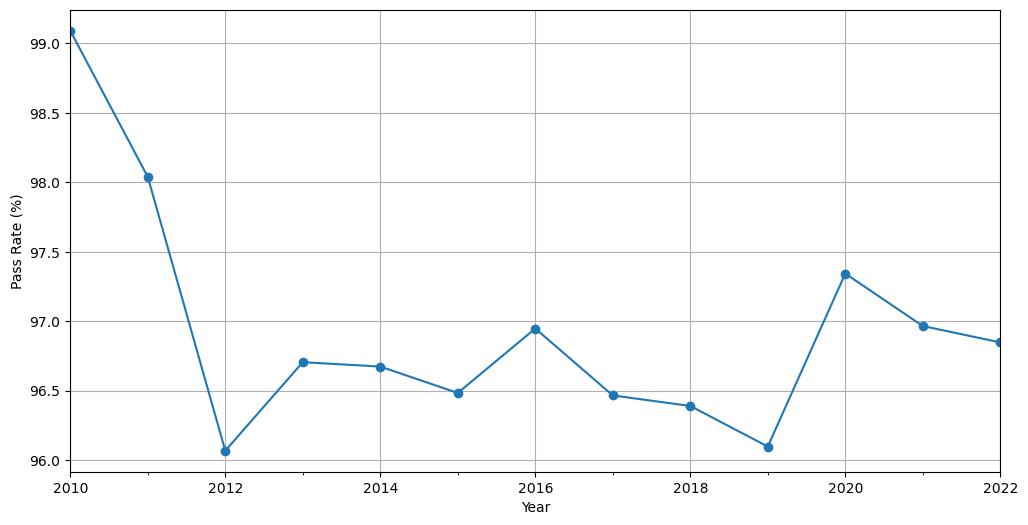

In [27]:
# Filter data for Bayern state
exams_thüringen = exams_concat[exams_concat['Federal States'] == 'Bayern']

# Group by year and sum the columns
df_sum = exams_thüringen.groupby('year').sum()

# Calculate overall pass rate
df_sum['Pass Rate'] = (df_sum['Passed Examinations'] / df_sum['Examinations Total']) * 100

# Extract year and pass rate columns
df_pass_rate = df_sum[['Pass Rate']]

# Convert year column to datetime
df_pass_rate.index = pd.to_datetime(df_pass_rate.index)

# Plot the pass rate over the years
df_pass_rate.plot(kind='line', marker='o', figsize=(12, 6))
#plt.title('Pass')
plt.xlabel('Year')
plt.legend().remove()
plt.ylabel('Pass Rate (%)')
plt.grid(True)
plt.show()

In [28]:
'''df = exams_concat

# Set year column as index
df.set_index('year', inplace=True)

# Define ARIMA model
model = ARIMA(df['Pass Rate'], order=(1, 0, 0))
model_fit = model.fit()

# Predict pass Rate for year 2023
start_date = pd.datetime(2023, 1, 1)
end_date = pd.datetime(2023, 12, 31)
predictions = model_fit.predict(start=start_date, end=end_date)

# Concatenate historical and predicted data
df_pred = pd.concat([df, pd.DataFrame(predictions, columns=['Pass Rate'])])

# Plot historical and predicted pass Rates
plt.figure(figsize=(12, 6))
plt.plot(df_pred.index, df_pred['Pass Rate'], label='Historical Pass Rate')
plt.scatter(predictions.index, predictions.values, c='r', marker='o', label='Predicted Pass Rate')
plt.xlabel('Year')
plt.ylabel('Pass Rate')
plt.title('Pass Rate Prediction for Year 2023')
plt.legend()
plt.show()'''

"df = exams_concat\n\n# Set year column as index\ndf.set_index('year', inplace=True)\n\n# Define ARIMA model\nmodel = ARIMA(df['Pass Rate'], order=(1, 0, 0))\nmodel_fit = model.fit()\n\n# Predict pass Rate for year 2023\nstart_date = pd.datetime(2023, 1, 1)\nend_date = pd.datetime(2023, 12, 31)\npredictions = model_fit.predict(start=start_date, end=end_date)\n\n# Concatenate historical and predicted data\ndf_pred = pd.concat([df, pd.DataFrame(predictions, columns=['Pass Rate'])])\n\n# Plot historical and predicted pass Rates\nplt.figure(figsize=(12, 6))\nplt.plot(df_pred.index, df_pred['Pass Rate'], label='Historical Pass Rate')\nplt.scatter(predictions.index, predictions.values, c='r', marker='o', label='Predicted Pass Rate')\nplt.xlabel('Year')\nplt.ylabel('Pass Rate')\nplt.title('Pass Rate Prediction for Year 2023')\nplt.legend()\nplt.show()"

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_74013/1898059574.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = exams_concat.groupby('year').sum()


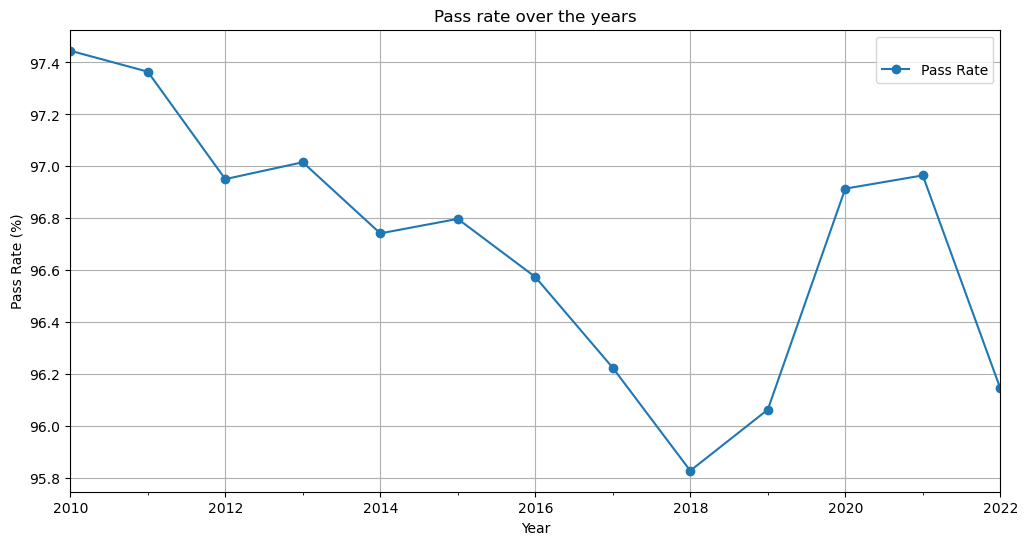

In [29]:
# Group by year and sum the columns
df_sum = exams_concat.groupby('year').sum()

# Calculate overall Pass rate
df_sum['Pass Rate'] = (df_sum['Passed Examinations'] / df_sum['Examinations Total']) * 100

# Extract year and Pass rate columns
df_Pass_rate = df_sum[['Pass Rate']]

# Convert year column to datetime
df_Pass_rate.index = pd.to_datetime(df_Pass_rate.index)

# Plot the Pass rate over the years
df_Pass_rate.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Pass rate over the years')
plt.xlabel('Year')
plt.ylabel('Pass Rate (%)')
plt.grid(True)
plt.show()

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_74013/3153658345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = exams_concat.groupby('year').sum()


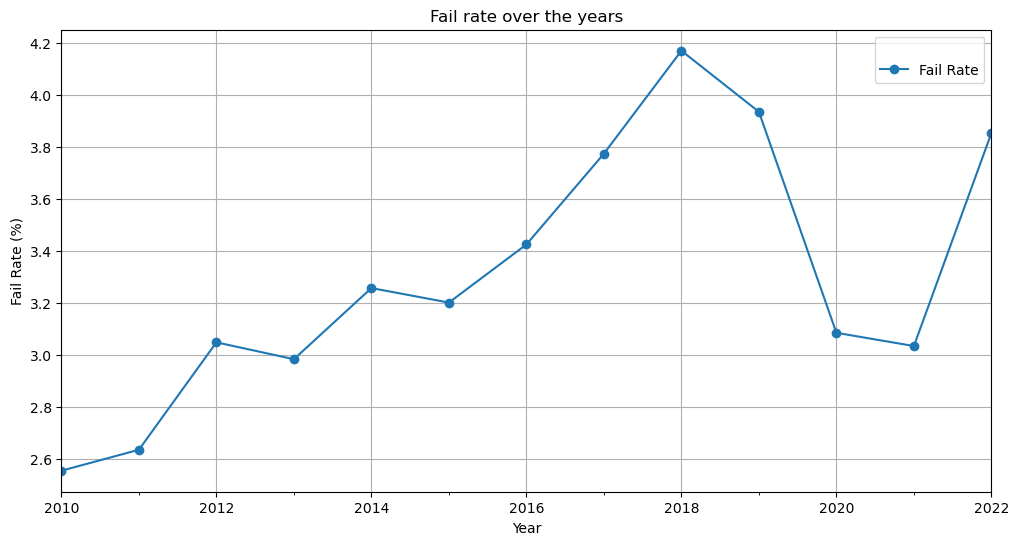

In [30]:
# Group by year and sum the columns
df_sum = exams_concat.groupby('year').sum()

# Calculate overall fail rate
df_sum['Fail Rate'] = (df_sum['Failed Examinations'] / df_sum['Examinations Total']) * 100

# Extract year and fail rate columns
df_fail_rate = df_sum[['Fail Rate']]

# Convert year column to datetime
df_fail_rate.index = pd.to_datetime(df_fail_rate.index)

# Plot the fail rate over the years
df_fail_rate.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Fail rate over the years')
plt.xlabel('Year')
plt.ylabel('Fail Rate (%)')
plt.grid(True)
plt.show()

In [31]:
exams_concat.columns

Index(['Federal States', 'Examinations Total', 'Passed Examinations',
       'Failed Examinations', 'year', 'Pass Rate', 'Fail Rate'],
      dtype='object', name=' ')

In [40]:
df_avg

,Federal States,Pass Rate
0,Baden-Wüttemberg,97.293379
1,Bayern,96.932067
2,Berlin,95.131880
3,Brandenburg,95.705320
4,Bremen,95.219964
5,Hamburg,96.262581
6,Hessen,96.762476
7,Mecklenburg-Vorpommern,94.006275
8,Niedersachsen,95.494601
9,Nordrhein-Westfalen,97.111472


In [46]:
top_states_lowest.sort_values('Federal States', ascending=True)

,Federal States,Fail Rate
0,Baden-Wüttemberg,2.706621
1,Bayern,3.067933
2,Berlin,4.868120
3,Brandenburg,4.294680
4,Bremen,4.780036
5,Hamburg,3.737419
6,Hessen,3.237524
7,Mecklenburg-Vorpommern,5.993725
8,Niedersachsen,4.505399
9,Nordrhein-Westfalen,2.888528


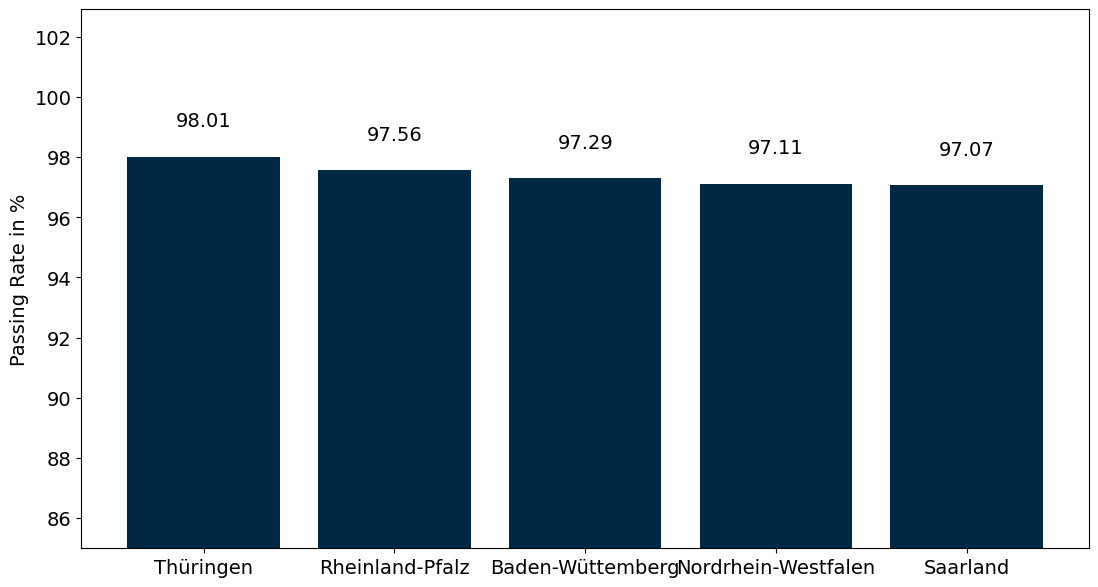

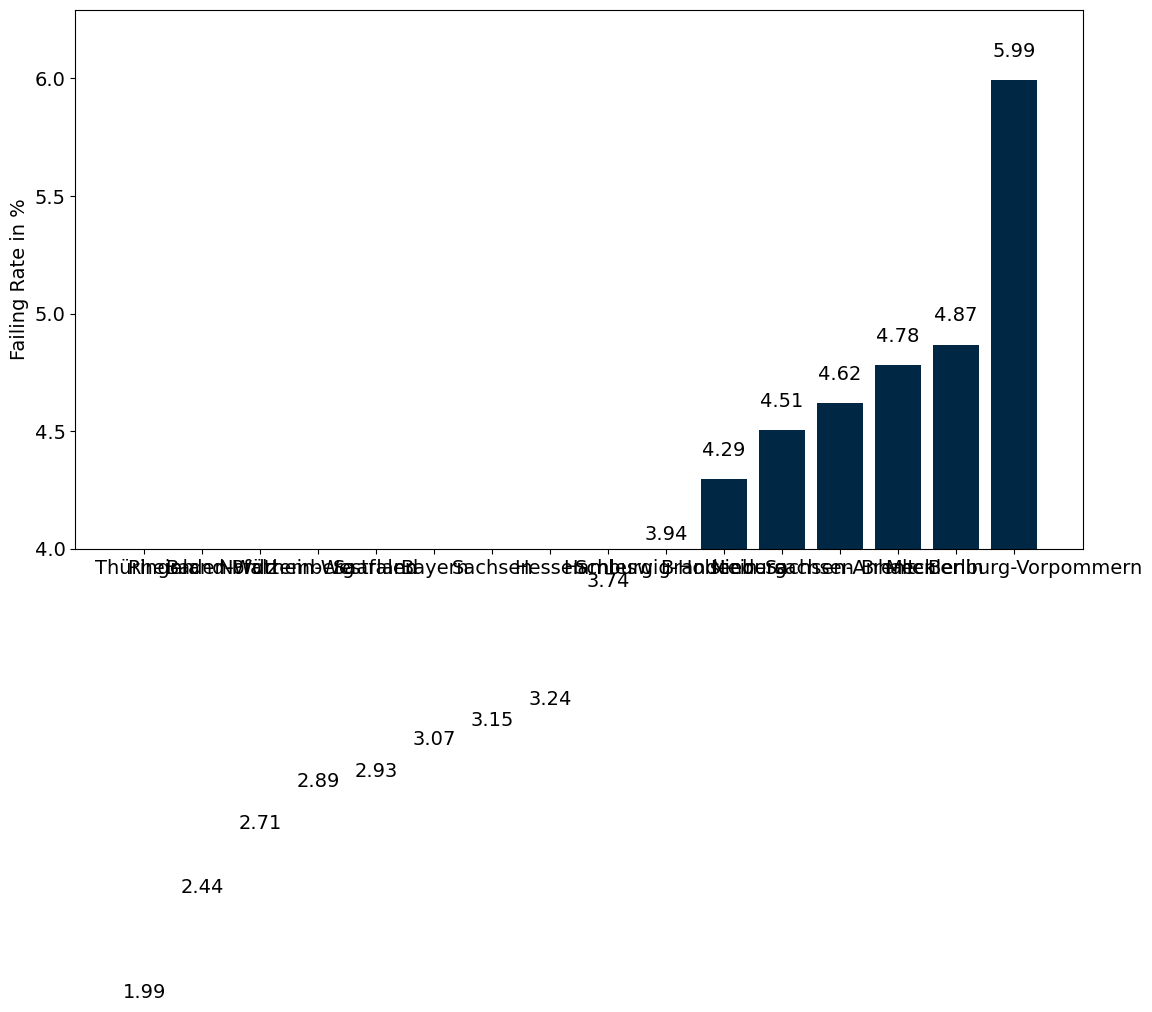

In [44]:
# Calculate the average passing rate for each state
df_avg = exams_concat.groupby('Federal States')['Pass Rate'].mean().reset_index()
df_avg_1 = exams_concat.groupby('Federal States')['Fail Rate'].mean().reset_index()

# Sort the states based on average Pass Rate
top_states_highest = df_avg.sort_values('Pass Rate', ascending=False).head(5)
top_states_lowest = df_avg_1.sort_values('Fail Rate', ascending=True)

plt.figure(figsize=(13, 7))
plt.rcParams.update({'font.size': 14})
# Create a bar chart for top 3 states with highest Pass Rate
plt.bar(top_states_highest['Federal States'], top_states_highest['Pass Rate'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Passing Rate in %')
#plt.title('Top 5 States with Highest Passing Rate in the Last Decade')
plt.ylim(bottom=85)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['Pass Rate']):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', color='black')

plt.show()



plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
plt.bar(top_states_lowest['Federal States'], top_states_lowest['Fail Rate'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Failing Rate in %')
#plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
plt.ylim(bottom=4)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['Fail Rate']):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')

plt.show()


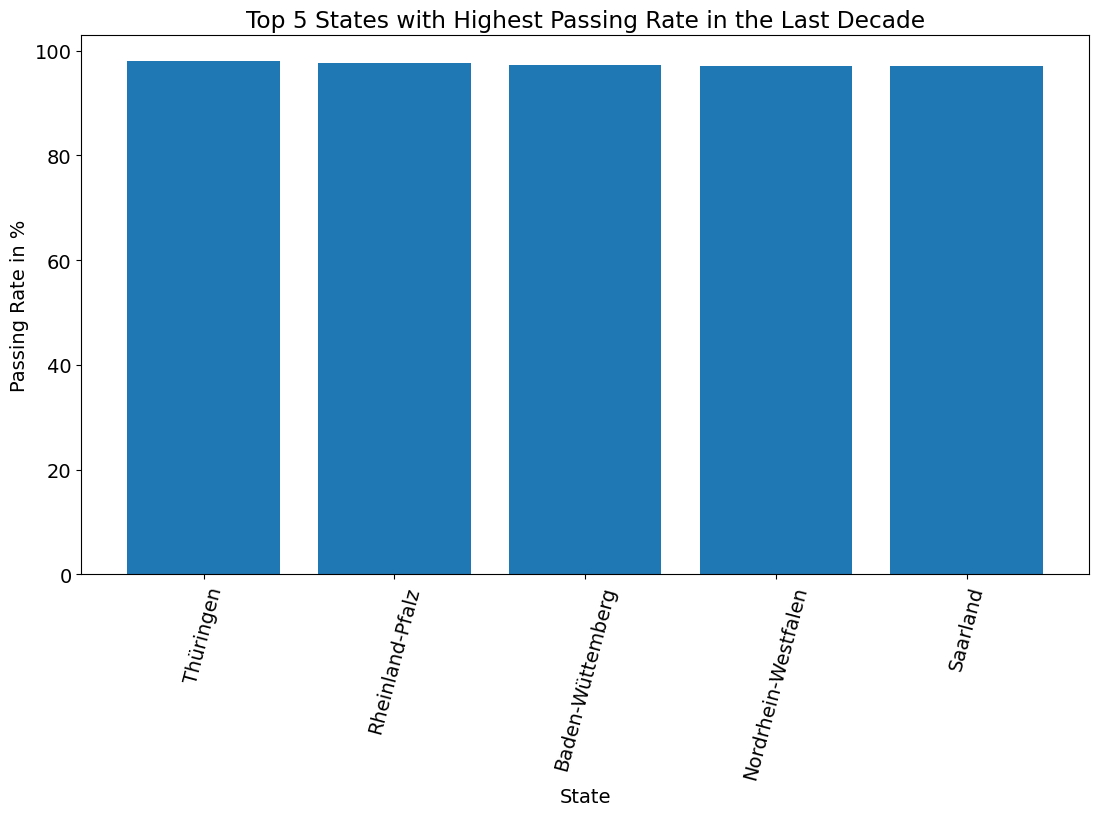

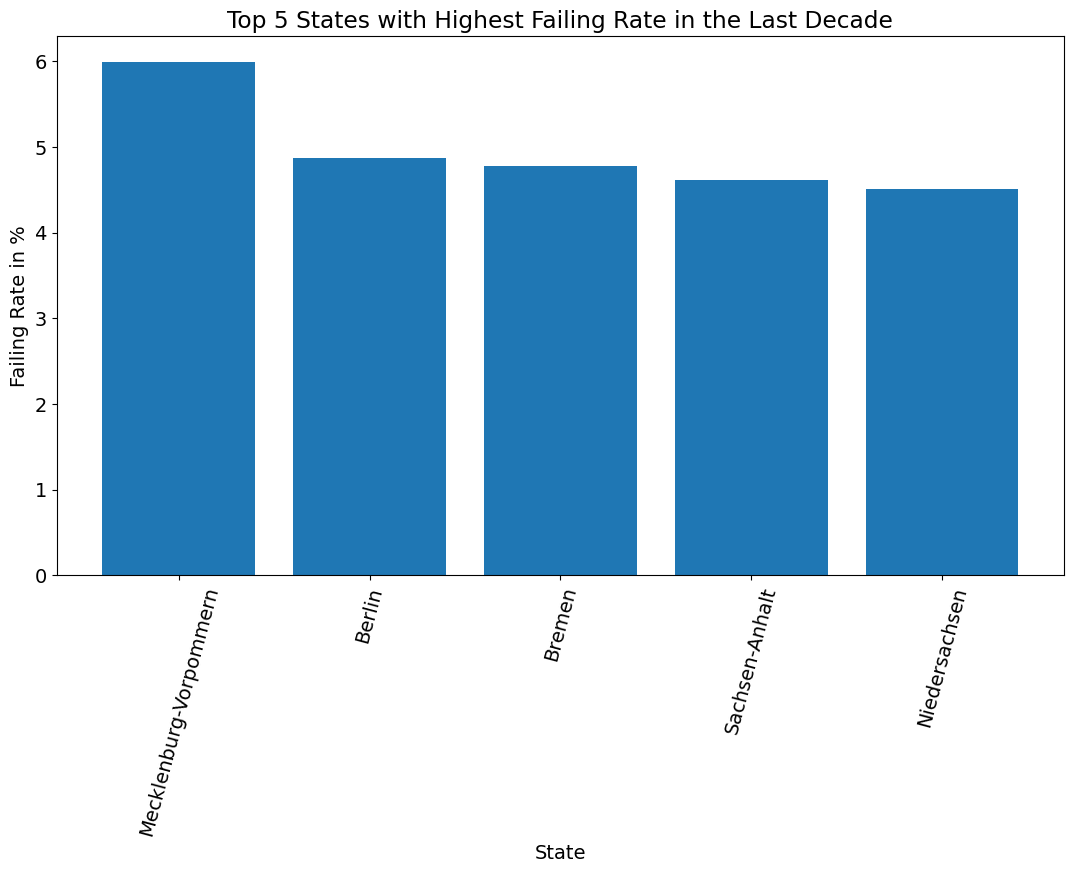

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average passing rate for each state
df_avg = exams_concat.groupby('Federal States')['Pass Rate'].mean().reset_index()
df_avg_1 = exams_concat.groupby('Federal States')['Fail Rate'].mean().reset_index()

# Sort the states based on average Pass Rate
top_states_highest = df_avg.sort_values('Pass Rate', ascending=False).head(5)
top_states_lowest = df_avg_1.sort_values('Fail Rate', ascending=False).head(5)

plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with highest Pass Rate
plt.bar(top_states_highest['Federal States'], top_states_highest['Pass Rate'])
plt.tick_params(axis='x', rotation=75)
plt.xlabel('State')
plt.ylabel('Passing Rate in %')
plt.title('Top 5 States with Highest Passing Rate in the Last Decade')
plt.ylim(bottom=0)  # Set the y-axis lower limit to 0
plt.show()

plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
plt.bar(top_states_lowest['Federal States'], top_states_lowest['Fail Rate'])
plt.tick_params(axis='x', rotation=75)
plt.xlabel('State')
plt.ylabel('Failing Rate in %')
plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
plt.ylim(bottom=0)  # Set the y-axis lower limit to 0
plt.show()


### Is there a significant difference in the number of failed examinations between 2020 and previous years

In [34]:
# Extract failed examinations data for 2020 and previous years
failed_exams_2020 = exams_concat[exams_concat['year'] == '2020-01-01']['Failed Examinations'].values[0]
failed_exams_previous = exams_concat[exams_concat['year'] != '2020-01-01']['Failed Examinations'].mean()

# Perform t-test
t_stat, p_value = stats.ttest_1samp(exams_concat[exams_concat['year'] != '2020-01-01']['Failed Examinations'], failed_exams_2020)

# Set significance level
alpha = 0.05

# Print results
print(f'Test statistic: {t_stat:.3f}')
print(f'P-value: {p_value:.3f}')

if p_value < alpha:
    print("There is a significant difference in the number of failed examinations between 2020 and previous years.")
else:
    print("There is no significant difference in the number of failed examinations between 2020 and previous years.")


Test statistic: -4.350
P-value: 0.000
There is a significant difference in the number of failed examinations between 2020 and previous years.


### Trend of Total, Paased and Failed Examinations

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_74013/1817231856.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = exams_concat.groupby('year').sum()


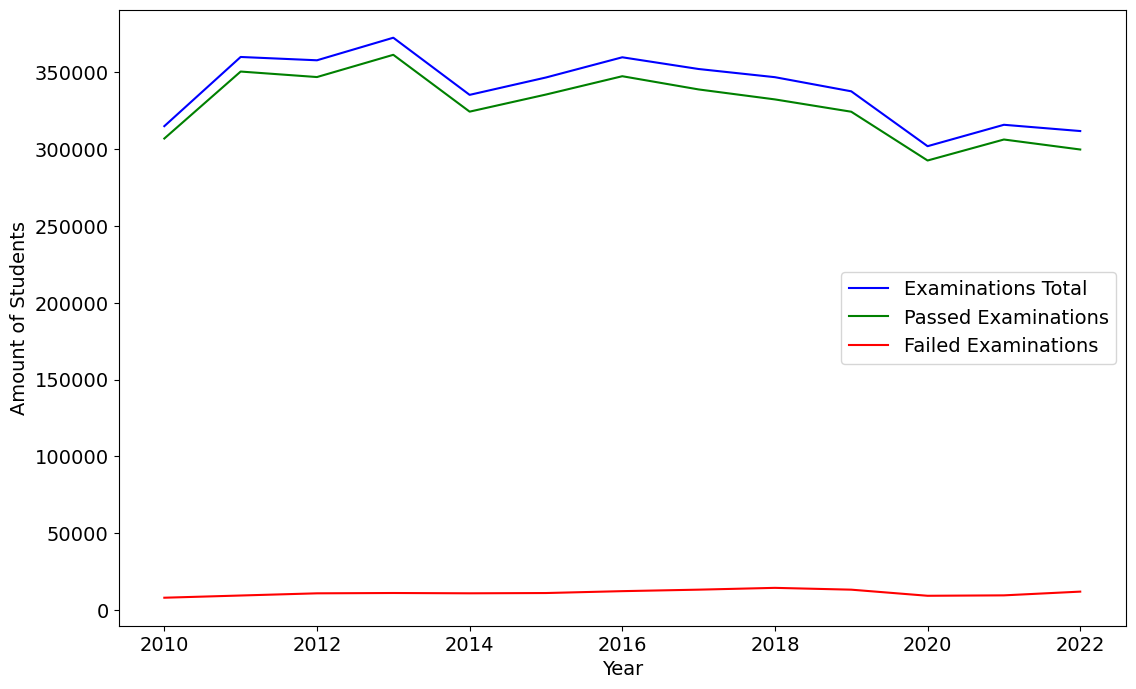

In [35]:
# Group by Year and calculate total examinations, passed examinations, and failed examinations
df_grouped = exams_concat.groupby('year').sum()

# Create a trend plot
plt.figure(figsize=(13, 8))
plt.plot(df_grouped.index.year, df_grouped['Examinations Total'], label='Examinations Total', color='blue')
plt.plot(df_grouped.index.year, df_grouped['Passed Examinations'], label='Passed Examinations', color='green')
plt.plot(df_grouped.index.year, df_grouped['Failed Examinations'], label='Failed Examinations', color='red')
plt.xlabel('Year')
plt.ylabel('Amount of Students')
#plt.title('Examinations in the Last Decade')
plt.legend()
plt.show()

In [36]:
import pandas as pd
from scipy.stats import pearsonr

# Create a dataframe with the given data
data = {'Federal States': ['BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW', 'BW'],
        'Examinations Total': [47635, 49671, 75286, 49486, 49665, 52400, 52592, 51724, 51152, 48937, 45903, 43507, 43507],
        'Passed Examinations': [46277, 48333, 73513, 48105, 48228, 51101, 51197, 50150, 49339, 47436, 44975, 42464, 42464],
        'Failed Examinations': [1358, 1338, 1773, 1381, 1437, 1299, 1395, 1574, 1813, 1501, 928, 1043, 1043],
        'year': ['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']}
df = pd.DataFrame(data)

# Calculate the Pearson correlation coefficient between 'Examinations Total' and 'Failed Examinations'
correlation_coef, _ = pearsonr(df['Examinations Total'], df['Failed Examinations'])

# Display the correlation coefficient
print("Pearson correlation coefficient between 'Examinations Total' and 'Failed Examinations':", correlation_coef)


Pearson correlation coefficient between 'Examinations Total' and 'Failed Examinations': 0.6687542453874354


BW: Baden-Württemberg
BY: Bayern
BE: Berlin
BB: Brandenburg
HB: Bremen
HH: Hamburg
HE: Hessen
MV: Mecklenburg-Vorpommern
NI: Niedersachsen
NW: Nordrhein-Westfalen
RP: Rheinland-Pfalz
SL: Saarland
SN: Sachsen
ST: Sachsen-Anhalt
SH: Schleswig-Holstein
TH: Thüringen

In [37]:
# Filter the data for years between 2010 and 2022
df_filtered = exams_concat[exams_concat['year'].between('2010-01-01', '2022-01-01')]

# Group the filtered data by year and calculate the total failed examinations
failed_exams_by_year = df_filtered.groupby('year')['Failed Examinations'].sum()

# Calculate the relative number of failed examinations for each year
relative_failed_exams_by_year = failed_exams_by_year / df_filtered.groupby('year')['Examinations Total'].sum()

# Print the relative number of failed examinations for each year
print("Year\tRelative Failed Examinations")
for year, relative_failed_exams in relative_failed_exams_by_year.items():
    print(f"{year}\t{relative_failed_exams:.4f}")

Year	Relative Failed Examinations
2010-01-01 00:00:00	0.0256
2011-01-01 00:00:00	0.0264
2012-01-01 00:00:00	0.0305
2013-01-01 00:00:00	0.0298
2014-01-01 00:00:00	0.0326
2015-01-01 00:00:00	0.0320
2016-01-01 00:00:00	0.0343
2017-01-01 00:00:00	0.0377
2018-01-01 00:00:00	0.0417
2019-01-01 00:00:00	0.0394
2020-01-01 00:00:00	0.0309
2021-01-01 00:00:00	0.0303
2022-01-01 00:00:00	0.0385


In [38]:
# Filter the data for years between 2010 and 2022
df_filtered = exams_concat[exams_concat['year'].between('2010-01-01', '2022-01-01')]

# Group the filtered data by year and calculate the total failed examinations
failed_exams_by_year = df_filtered.groupby('year')['Failed Examinations'].sum()

# Calculate the relative number of failed examinations for each year
relative_failed_exams_by_year = failed_exams_by_year / df_filtered.groupby('year')['Examinations Total'].sum()

# Print the relative number of failed examinations for each year
print("Year\tRelative Failed Examinations")
for year, relative_failed_exams in relative_failed_exams_by_year.items():
    print(f"{year}\t{relative_failed_exams:.4f}")


Year	Relative Failed Examinations
2010-01-01 00:00:00	0.0256
2011-01-01 00:00:00	0.0264
2012-01-01 00:00:00	0.0305
2013-01-01 00:00:00	0.0298
2014-01-01 00:00:00	0.0326
2015-01-01 00:00:00	0.0320
2016-01-01 00:00:00	0.0343
2017-01-01 00:00:00	0.0377
2018-01-01 00:00:00	0.0417
2019-01-01 00:00:00	0.0394
2020-01-01 00:00:00	0.0309
2021-01-01 00:00:00	0.0303
2022-01-01 00:00:00	0.0385


KeyError: 'BW'

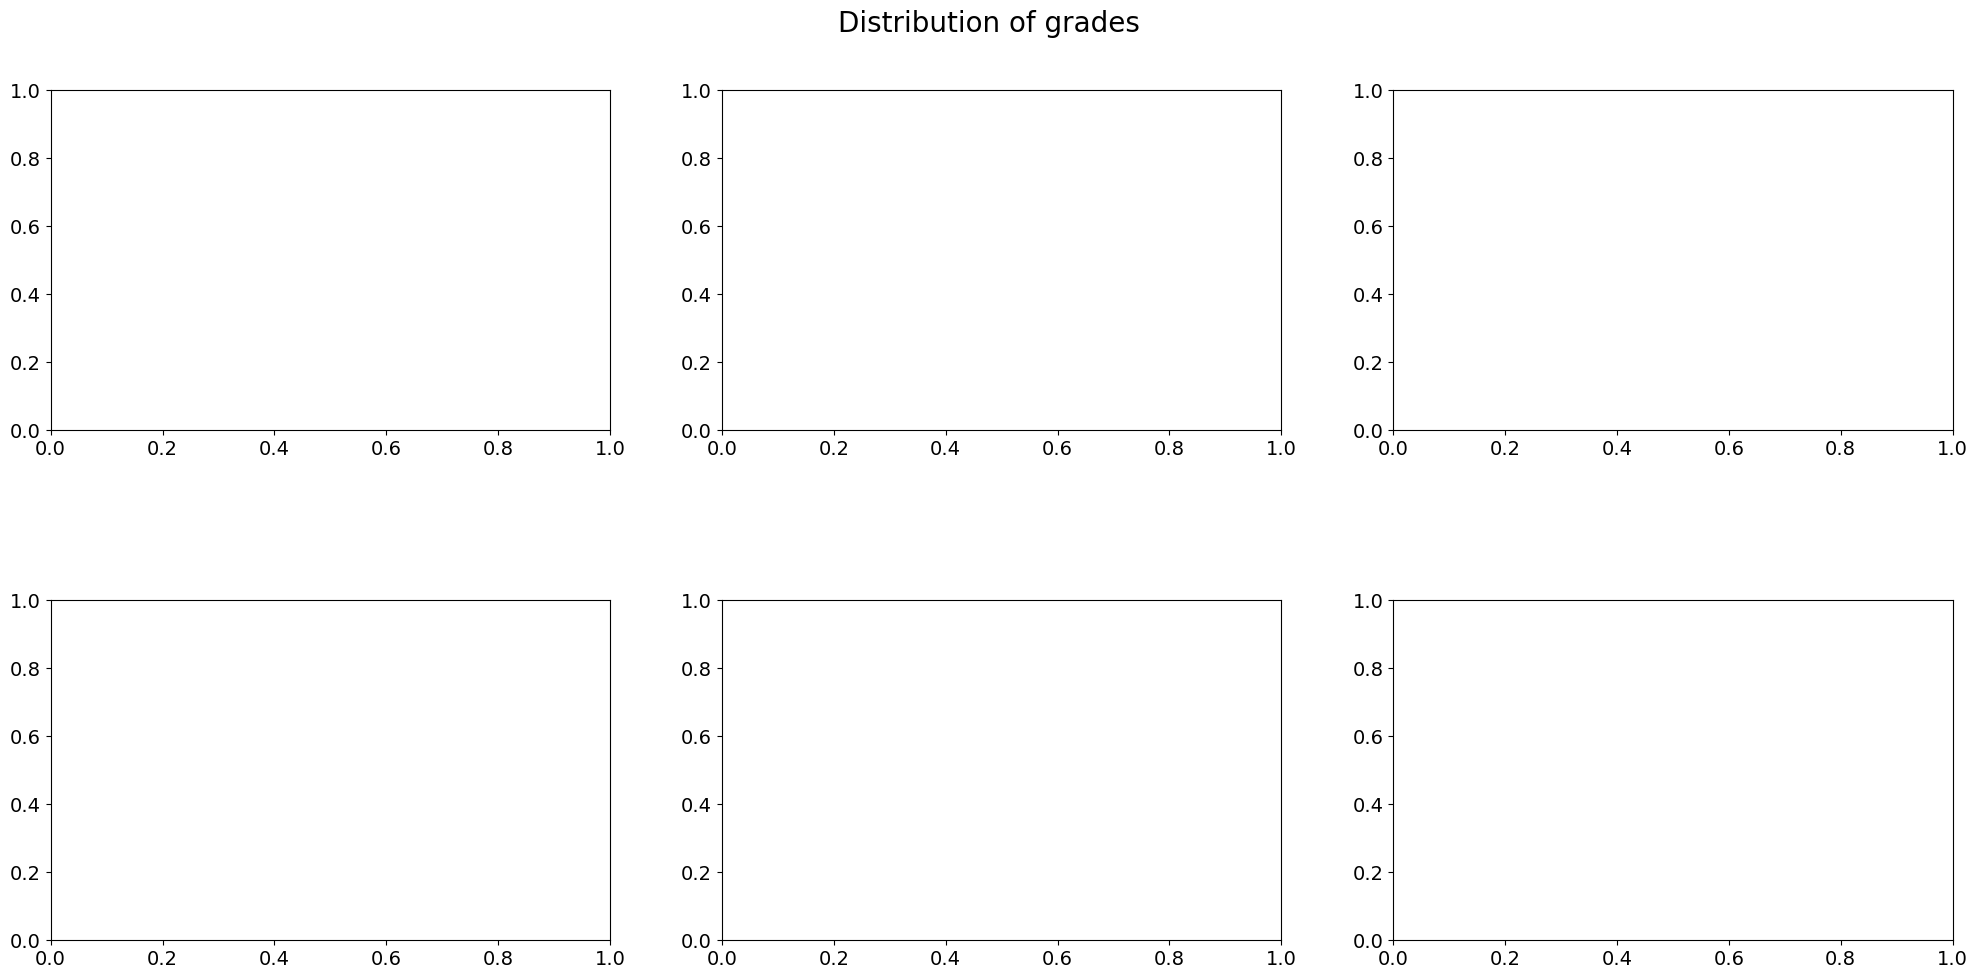

In [39]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of grades', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=exams_2022['BW'], bins=832)  # creates histogram for number of frequency
ax[0][0].set_ylabel("No of people by grade", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,4.000000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Totals of Examinations, Passed and Failed", fontsize = 15);  # sets title for subplot

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of grades', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=exams_2022['BW'], bins=832)  # creates histogram for number of frequency
ax[0][0].set_ylabel("No of people by grade", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,4.000000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15);  # sets title for subplot




In [ ]:
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x=exams_2022['Totals'], y=exams_2022['NW']) # create plot
f1.tick_params(axis=('both'), rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis
f1.set_ylabel("Grades", fontsize = 10); # set label for y-axis
f1.set_title('Totals', fontsize=20); # set title